In [28]:
import urllib2
from IPython.display import display

from rmgpy.molecule import Molecule

In [65]:
def compress_adjacency_list(adjlist):
    mult = None
    atom_list = []
    bond_set = set()
    lines = adjlist.splitlines()
    for line in lines:
        if 'multiplicity' in line:
            mult = line.split()[1]
            continue
        # split into atom section and bond section
        index = line.find('{')
        atom_info = line[0:index].strip().split()
        bond_info = line[index:].strip().split()
        # replace spaces in atom section with periods
        atom_list.append('.'.join(atom_info[1:]))
        current_index = atom_info[0]
        # bonds should be pairs of indices
        for bond in bond_info:
            parts = bond[1:-1].split(',')
            indices = [current_index, parts[0]]
            indices.sort()
            entry = '.'.join(indices + [parts[1]])
            bond_set.add(entry)
    # combine into string
    bond_list = sorted(list(bond_set))
    if mult is not None:
        compressed = 'mult{0}'.format(mult) + '_' + '-'.join(atom_list) + '_' + '-'.join(bond_list)
    else:
        compressed = '-'.join(atom_list) + '_' + '-'.join(bond_list)
    
    return compressed
    
    
def decompress_adjacency_list(comp_adjlist):
    parts = comp_adjlist.split('_')
    if len(parts) == 3:
        mult = parts[0][4:]
        atom_info = parts[1].split('-')
        bond_info = parts[2].split('-')

    elif len(parts) == 2:
        mult = None
        atom_info = parts[0].split('-')
        bond_info = parts[1].split('-')

    atom_list = []
    for i, atom in enumerate(atom_info):
        atom_list.append(str(i+1) + ' ' + ' '.join(atom.split('.')))
    bond_dict = {}
    for bond in bond_info:
        parts = bond.split('.')
        ind1 = int(parts[0])
        ind2 = int(parts[1])
        order = parts[2]
        if ind1 in bond_dict:
            bond_dict[ind1].append((ind2, order))
        else:
            bond_dict[ind1] = [(ind2, order)]
        if ind2 in bond_dict:
            bond_dict[ind2].append((ind1, order))
        else:
            bond_dict[ind2] = [(ind1, order)]
            
    bond_list = []
    for i in range(len(atom_list)):
        bonds = sorted(bond_dict[i+1], key=lambda x: x[0])
        bond_list.append(' '.join(['{{{0},{1}}}'.format(a, b) for a, b in bonds]))
    
    lines = [atom + ' ' + bond for atom, bond in zip(atom_list, bond_list)]
    if mult is not None:
        adjlist = 'multiplicity {0}\n'.format(mult)
    else:
        adjlist = ''
    adjlist += '\n'.join(lines)
    
    return adjlist
        

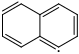

478 958 309 309
multiplicity 2
1  C u0 p0 c0 {2,S} {3,D} {4,S}
2  C u0 p0 c0 {1,S} {5,S} {10,D}
3  C u0 p0 c0 {1,D} {8,S} {12,S}
4  C u0 p0 c0 {1,S} {6,D} {13,S}
5  C u0 p0 c0 {2,S} {7,D} {16,S}
6  C u0 p0 c0 {4,D} {7,S} {14,S}
7  C u0 p0 c0 {5,D} {6,S} {15,S}
8  C u0 p0 c0 {3,S} {9,D} {11,S}
9  C u0 p0 c0 {8,D} {10,S} {17,S}
10 C u1 p0 c0 {2,D} {9,S}
11 H u0 p0 c0 {8,S}
12 H u0 p0 c0 {3,S}
13 H u0 p0 c0 {4,S}
14 H u0 p0 c0 {6,S}
15 H u0 p0 c0 {7,S}
16 H u0 p0 c0 {5,S}
17 H u0 p0 c0 {9,S}

multiplicity 2
1 C u0 p0 c0 {2,S} {3,D} {4,S}
2 C u0 p0 c0 {1,S} {5,S} {10,D}
3 C u0 p0 c0 {1,D} {8,S} {12,S}
4 C u0 p0 c0 {1,S} {6,D} {13,S}
5 C u0 p0 c0 {2,S} {7,D} {16,S}
6 C u0 p0 c0 {4,D} {7,S} {14,S}
7 C u0 p0 c0 {5,D} {6,S} {15,S}
8 C u0 p0 c0 {3,S} {9,D} {11,S}
9 C u0 p0 c0 {8,D} {10,S} {17,S}
10 C u1 p0 c0 {2,D} {9,S}
11 H u0 p0 c0 {8,S}
12 H u0 p0 c0 {3,S}
13 H u0 p0 c0 {4,S}
14 H u0 p0 c0 {6,S}
15 H u0 p0 c0 {7,S}
16 H u0 p0 c0 {5,S}
17 H u0 p0 c0 {9,S}


In [71]:
mol = Molecule().fromSMILES('c12[c]cccc1cccc2')
display(mol)

adjlist = mol.toAdjacencyList()

comp = compress_adjacency_list(mol.toAdjacencyList())

decomp = decompress_adjacency_list(comp)

quoted = urllib2.quote(adjlist)
quoted2 = urllib2.quote(comp)

print len(adjlist), len(quoted), len(comp), len(quoted2)

print adjlist
print decompress_adjacency_list(comp)